# Preliminary EDA on Data Subset with >= 35g Sugar

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Look at data

In [2]:
data = pd.read_csv('data/openfoodfacts_export_35addedSugar.csv', delimiter='\t')
data.head()

,code,lc,product_name_cs,product_name_de,product_name_en,product_name_es,product_name_fr,product_name_pt,generic_name_en,generic_name_es,...,off:ecoscore_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials,off:ecoscore_data.adjustments.production_system.value,off:ecoscore_data.adjustments.threatened_species.value,sources_fields:org-database-usda:available_date,sources_fields:org-database-usda:fdc_category,sources_fields:org-database-usda:fdc_data_source,sources_fields:org-database-usda:fdc_id,sources_fields:org-database-usda:modified_date,sources_fields:org-database-usda:publication_date,data_sources
0,4056489156192,fr,Hořká čokoláda s pekanovými ořechy a kokosem,Way To Go Zartbitterschokolade Pecan Kokos,Coconut Pecan Dark Chocolate Bar,NaN,Way to go Pecan Coconut,NaN,NaN,NaN,...,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps, App - Open Food Facts, App -..."
1,79200558338,en,NaN,NaN,Nerds Candy - Rainbow,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,2019-01-06T00:00:00Z,Candy,LI,667508.0,2019-01-06T00:00:00Z,2019-12-06T00:00:00Z,"Database - FoodRepo / openfood.ch, Databases, ..."
2,40000001607,en,NaN,NaN,Original Skittles,NaN,NaN,NaN,NaN,NaN,...,1,0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps, App - InFood, App - IsVe"
3,853522000306,en,NaN,NaN,Semi-Sweet Mini Chips,NaN,NaN,NaN,Mini Chocolate Chips,NaN,...,1,0,NaN,2019-07-17T00:00:00Z,Baking Decorations & Dessert Toppings,LI,667414.0,2019-07-17T00:00:00Z,2019-12-06T00:00:00Z,"Databases, database-usda, Database - USDA NDB,..."
4,13409451328,en,NaN,NaN,Barbecue Sauce (Original),NaN,NaN,NaN,NaN,NaN,...,1,0,NaN,2018-01-31T00:00:00Z,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,406374.0,2018-01-31T00:00:00Z,2019-04-01T00:00:00Z,"Databases, database-usda, App - Horizon, App -..."


In [3]:
data.info() 
# 390 rows
# 123 object vars, 70 floats, 6 ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Columns: 199 entries, code to data_sources
dtypes: float64(70), int64(6), object(123)
memory usage: 608.0+ KB


### Cleaning

In [4]:
# see and save dimensions
print(data.shape)
allrows = data.shape[0]
allcols = data.shape[1]

(391, 199)


In [5]:
# Check for a drop observations with no data at all
data.dropna(how='all', inplace=True)

print('Removed {} empty rows'.format(allrows-data.shape[0]))

Removed 0 empty rows


In [6]:
# Check for and drop variables with no data at all
empty_variables = data.columns[data.isnull().sum() == data.shape[0]]
data.dropna(how='all', axis=1, inplace=True)

print('Removed {} empty variables'.format(len(empty_variables)))
print('Variables removed: \n{}'.format(empty_variables))

Removed 2 empty variables
Variables removed: 
Index(['obsolete_since_date', 'no_nutrition_data'], dtype='object')


In [7]:
# Check for a drop duplicates observations
duplicates_count = data.duplicated().sum()
data.drop_duplicates(inplace=True)

print('Number of duplicates dropped: {}'.format(duplicates_count))

Number of duplicates dropped: 0


In [8]:
# see new dimensions 
print(data.shape)

(391, 197)


In [9]:
# Set the code as the index
data.set_index('code', inplace=True)

In [10]:
# Notes: 
    # there were no completely empty rows in this data subset
    # There were 2 columns with only NA values: obsolete_since_date, no_nutrition_data
    # there were no duplicate rows

### Look at NA Dist

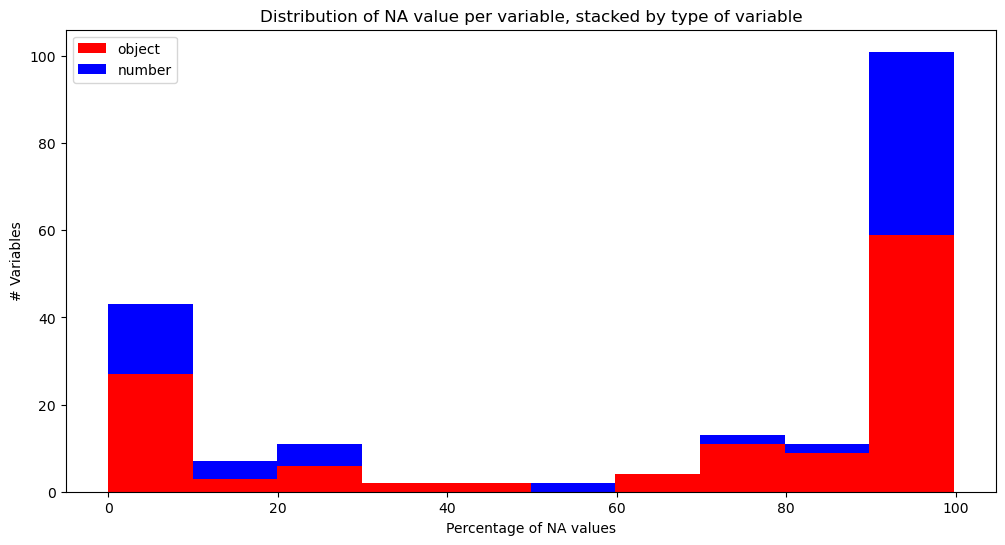

In [11]:
# lets see the NA distribution 


# dist of missing values per variable, stacked by type of variable
na_counts_object_vars = data.select_dtypes('object').isnull().sum() / data.shape[0] * 100
na_counts_number_vars = data.select_dtypes('number').isnull().sum() / data.shape[0] * 100

pd.DataFrame({'object': na_counts_object_vars, 'number': na_counts_number_vars}) \
  .plot.hist(stacked=True, bins=10, figsize=(12, 6), color=['red', 'blue'])

plt.xlabel('Percentage of NA values')
plt.ylabel('# Variables')
plt.title('Distribution of NA value per variable, stacked by type of variable')
plt.show()

### Looking at top occuring items

In [12]:
# Get the top occurencies function
def get_top_occurencies(df, cols, n=10):
    count = df.groupby(cols).size().sort_values(ascending=False)
    count_percent = round(count / df.shape[0] * 100, 2)
    return pd.DataFrame({'count': count, 'count %': count_percent}).head(n)

In [13]:
# Get the top product names (in english)
get_top_occurencies(data, 'product_name_en', n=10)

,count,count %
product_name_en,,
Mini Marshmallows,4,1.02
Oreos,3,0.77
m&m's Milk Chocolate,3,0.77
Organic Fruit Flavored Snacks - Berry Medley,3,0.77
Kisses milk chocolate,2,0.51
Sweet Orange Marmalade,2,0.51
Nutella & Go! with Breadsticks,2,0.51
Syrup,2,0.51
Berry Lemonade Infusion Drink Mix,2,0.51


In [15]:
# Get the top brands
get_top_occurencies(data, 'brands', n=10)

,count,count %
brands,,
Betty Crocker,15,3.84
Trader Joe's,9,2.30
Russell Stover,8,2.05
"Oreo,Nabisco",8,2.05
Baker's Corner,8,2.05
Ghirardelli,8,2.05
Lindt,7,1.79
Hershey's,7,1.79
Reese's,7,1.79


In [18]:
# Get the top nutrition scores
get_top_occurencies(data, 'off:nutriscore_grade', n=10)

# funny to note no score of a or b for foods with >35g sugar

,count,count %
off:nutriscore_grade,,
e,200,51.15
d,120,30.69
unknown,47,12.02
c,18,4.60
not-applicable,6,1.53


In [14]:
# Get the top packaging type
get_top_occurencies(data, 'packaging', n=10)

# oh gosh we will need to separate this var more by commas 
# and combine similar items 

,count,count %
packaging,,
"Plastic, Bag",12,3.07
"Composite material, Plastic, Bag, Recyclable material, Recyclable plastic, Tray",4,1.02
"Composite material, Bag",2,0.51
Bag,2,0.51
"Plastic, Pouch flask",2,0.51
"Plastic, Paper, Bag, Box",2,0.51
"Papel, Bolsa, Caja, en:Individual bag",2,0.51
Plastic bag,1,0.26
"Paper, Bag, Box, Individual bag",1,0.26


### Trying to assign just one packaging per obs

In [20]:
df = data

# Everything in lowercases
df['packaging_c'] = df.packaging.str.lower()

# Strip whitespaces
df.packaging_c = df.packaging_c.str.strip()

# Replace multiple whitespaces with only one space
df.packaging_c = df.packaging_c.str.replace(r"\s+", " ")

# Remove whitespaces after comma
df.packaging_c = df.packaging_c.str.replace(r",\s+", ",")

# Remove some special characters (used in regex)
df.packaging_c = df.packaging_c.str.replace(r"[\*|\?|\.]", "")

/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_86638/1193615587.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['packaging_c'] = df.packaging.str.lower()
/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_86638/1193615587.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.packaging_c = df.packaging_c.str.replace(r"\s+", " ")
/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_86638/1193615587.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df.packaging_c = df.packaging_c.str.replace(r",\s+", ",")
/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_86638/1193615587.py:16: FutureWarning: The default value of re

In [21]:
# Check the result after cleaning
df.packaging_c.head(50)

code
4056489156192                   papier,fsc
79200558338               box,card-unknown
40000001607                            NaN
853522000306                           NaN
13409451328                     pet-bottle
44000053710                            NaN
41420048548                            NaN
79200060688                            NaN
9800800056                             NaN
31200006783                            NaN
88702015652                      glass,jar
894455000254                           NaN
4099100118599                          NaN
28000514037                            NaN
44000060237                            NaN
3444009                    plastic,wrapper
4003207                                bag
3404700                                NaN
43000000373             plastic,pet-bottle
16000197268                            NaN
3424005                            wrapper
221290                             plastic
7501008044278                          NaN
340001

In [38]:
# Extract the packaging (one observation per code per packaging, multi-index = code + match )
df_packagings = df.packaging_c.str.extractall(r"(?P<packaging_1>[^,]+)")

# Reset the index
df_packagings.reset_index(inplace=True)

# Drop the automatically created column: match
df_packagings.drop('match', axis=1, inplace=True)

# Remove duplicates
df_packagings.drop_duplicates(inplace=True)

# Set the code as the index
df_packagings.set_index('code', inplace=True)

df_packagings.head(10)

,packaging_1
code,
4056489156192,papier
4056489156192,fsc
79200558338,box
79200558338,card-unknown
13409451328,pet-bottle
88702015652,glass
88702015652,jar
3444009,plastic
3444009,wrapper


In [39]:
# Merge the dataframes to have one allergen per observation but with also the description of the product
df_packagings = df_packagings.merge(df, right_index=True, left_index=True)
df_packagings.head()

,packaging_1,lc,product_name_cs,product_name_de,product_name_en,product_name_es,product_name_fr,product_name_pt,generic_name_en,generic_name_es,...,off:ecoscore_data.adjustments.production_system.value,off:ecoscore_data.adjustments.threatened_species.value,sources_fields:org-database-usda:available_date,sources_fields:org-database-usda:fdc_category,sources_fields:org-database-usda:fdc_data_source,sources_fields:org-database-usda:fdc_id,sources_fields:org-database-usda:modified_date,sources_fields:org-database-usda:publication_date,data_sources,packaging_c
code,,,,,,,,,,,,,,,,,,,,,
221290,plastic,en,NaN,NaN,Milk Chocolate Peanut Butter Cups,NaN,NaN,NaN,NaN,NaN,...,0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps, App - smoothie-openfoodfacts",plastic
550871,plastic,en,NaN,NaN,Toffee chips,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps","plastic,box,cardboard,tray"
550871,box,en,NaN,NaN,Toffee chips,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps","plastic,box,cardboard,tray"
550871,cardboard,en,NaN,NaN,Toffee chips,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps","plastic,box,cardboard,tray"
550871,tray,en,NaN,NaN,Toffee chips,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps","plastic,box,cardboard,tray"


In [41]:
# Get the top packaging type
get_top_occurencies(df_packagings, 'packaging_1', n=10)

,count,count %
packaging_1,,
plastic,26,16.67
bag,25,16.03
box,8,5.13
tray,6,3.85
composite material,6,3.85
recyclable plastic,4,2.56
recyclable material,4,2.56
glass,4,2.56
wrapper,3,1.92


In [42]:
# yay! It worked! So we can follow a similar process for any other columns
# that we want to split up (countries, category, allenergens, etc.)
# still need to namage items in other languages though...